In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Промежуточный вывод
Выгрузка данных в переменную df прошла корректно. Всего в датафрейме 11 столбцов и почти 17 тысяч строк. Уже из метода info видно что, есть пропущенные значения, возможно не везде правильно указан тип данных и т.д. Займемся предобработкой на втором шаге.

## Подготовка данных


In [4]:
df.columns = map(str.lower, df.columns)
df = df.dropna(subset = ['year_of_release','name','genre'])
df['rating'] = df['rating'].replace(np.NaN, 'X')
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].replace(np.NaN, -1)
df['critic_score'] = df['critic_score'].replace(np.NaN, -1)
df = df.astype({ "year_of_release": "int64", "user_score": "float64"})

На данном шаге мы привели все названия столбцов к нижнему регистру. Поменяли тип данных в столбце "year_of_release" - год должен быть указан как целочисленное, поэтому выбрали int вместо float. В столбце "user_score"- оценка ставится по 10-ти балльной шкале, исходя из этого произвели замену на float вместо object, но сперва заменили аббревиатуру "tbd"(To Be Determined (будет определено) на Nan.Заполнили пропуски этот шаг у меня был после вывода ниже, но платформа не пропускала код в такой последователности.Пришлось перенсти в первый шаг.

In [5]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Как видим пропуски у нас в 6 столбцах:
* В столбцах name,year_of_realease,genre их всего 273- предлагаю просто удалить эти строки, так как данных относительно всего df  мы потеряем меньше двух процентов(16700/300 ~ 1.7%), а замена на среднее или медиану не представляется возможным.Отсутсвие значений по жанру и названию можно объяснить человеческой ошибкой, касаемо года релиза, может быть на момент сбора данных он не был определен.

* Оценки критиков заполним медианой(т.к оценка варьируется от 0 до 100). Значений слишком много, чтобы просто удалять их. Оценки пользователей идут от 0 до 10. Выбросов, которые могут повлиять на общую картину здесь не может быть,поэтому заполним средним.
 Думаю пропуски здесь обусловены тем что игра мало известна широкой публике или релиз прошел не так давно и игру еще не успели оценить.
* Что касается столбца Rating, то удаление здесь также не подойдет(слишком много данных потеряем), замена на среднее( медиану) невозможна. Предлагаю заменить на символ 'X', он будет означать, что рейтинг не был указан для этой игры. Думаю пропуски здесь обусловены тем, что игра мало известна широкой публике или релиз прошел не так давно и игру еще не успели оценить.

От пропусков избависилсь на первом шаге теперь перейдем к дубликатам.
Для начала взглянем на уникальные значения в интересующих нас столбцах. В конце обновим индексы датасета.

In [6]:
print(df['name'].unique())
print(df['platform'].unique())
print(df['genre'].unique())
print(df['rating'].unique())
df.reset_index()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['E' 'X' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,X
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,X
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,X
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,X
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,X


In [7]:
df.duplicated().sum()

0

Дубликаты не обнаружены. Осталось создать новый столбец с суммарными продажами.

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Все готово. Мы убрали из датасета все пропуски, проверили его на наличие дубликатов, поменяли типы данных. Создали дополнительную колонку с общими суммами продаж, а так же привели все обозначения в необходимый вид.

Можно присупать к исследованию.

In [9]:

# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных


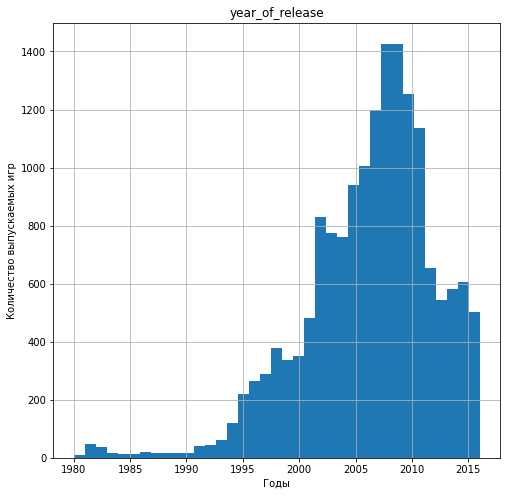

In [10]:
#df.groupby('year_of_release')['name'].count().sort_values()
df.hist(column=['year_of_release','name'],bins=37,grid=True,figsize=(8,8));

plt.xlabel("Годы");
plt.ylabel("Количество выпускаемых игр");

Данных до 1990 года не так много в данном случае мы можем ими принебречь. Пик выуска игр приходится на период 2007-2010, обусловлено это возможно тем что на тот момент было много игровых платформ и каждая из них генерировала игры под себя. Думаю логично будет проанализировать показатели в разрезе платформ, так как опираясь на опыт нынешних лет, на рынке преобладает всего лишь несколько крупных игроков приставок.

In [11]:
df.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

Для того, чтобы была видна динамика, рассмотрим продажи на разных платформах по годам.

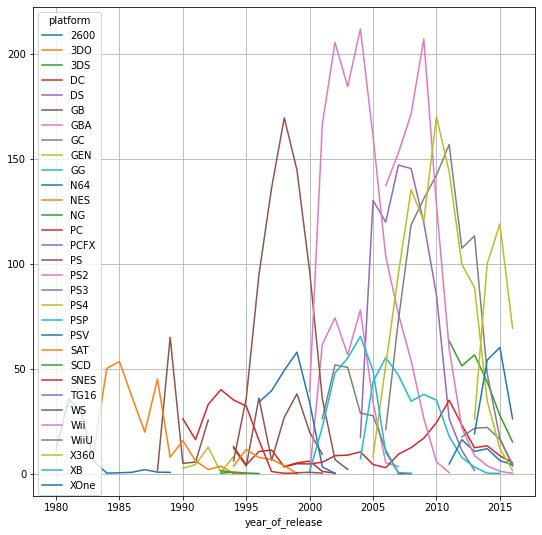

In [12]:
df.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(9, 9))
plt.show()

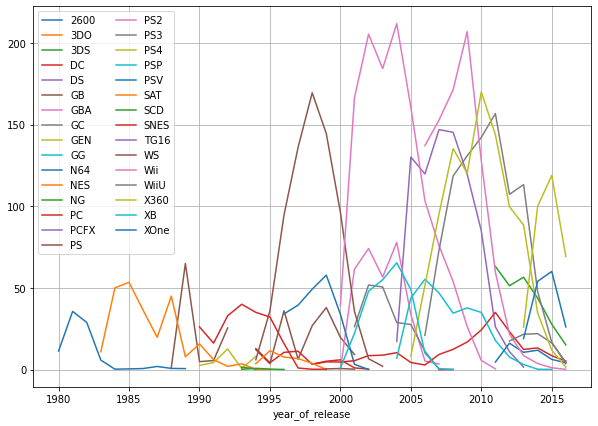

In [13]:

df.pivot_table(index='year_of_release', columns = 'platform', 
               values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 7))
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2)
plt.show()

Максимально не информативно, предлагаю взять последнюю пятилетку.

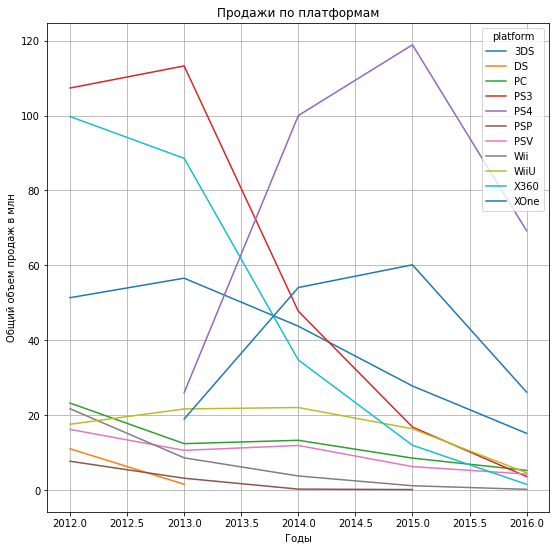

In [14]:
df.query(" year_of_release >= 2012")\
.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(9, 9))
plt.title("Продажи по платформам")
plt.xlabel("Годы")
plt.ylabel("Общий объем продаж в млн")
plt.show()

Из графика видно, что все платформы погазывают стагнацию, однако можно выделить тройку игроков по суммам продаж, которые в разы обгоняют конкурентов по итогам 2016 года: PS4,Xone,3DS.

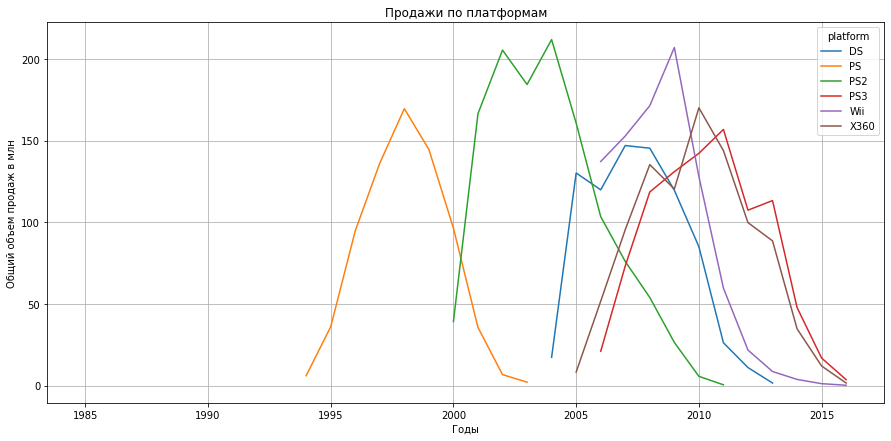

In [15]:
platform_totalsales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(6, 'total_sales').index
df.query('platform in @platform_totalsales').pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum').plot(figsize = (15,7))
plt.title("Продажи по платформам")
plt.xlabel("Годы")
plt.ylabel("Общий объем продаж в млн")
plt.grid()
plt.show()

Данный график говорит о том, что жизненный цикл платформы в среднем 10 лет.

In [16]:
df_new = df.query("year_of_release >= 2014")

Для построения прогноза на 2017 год, возьмем данные датасета  за последние два года и в дальшнейшем будем работать с ними. Из предыдущего графика уже можно сделать вывод: что лидеров продаж всего три на текущий период, к тому же продажи остальных игроков рынка стремятся к нулю. Картина не столь радужна, даже объемы продаж тройки лидеров падуют последние несколько лет. Xone  и  PS4 появились на рынке в 2013 году и до 2015 года показывали прорывной рост продаж

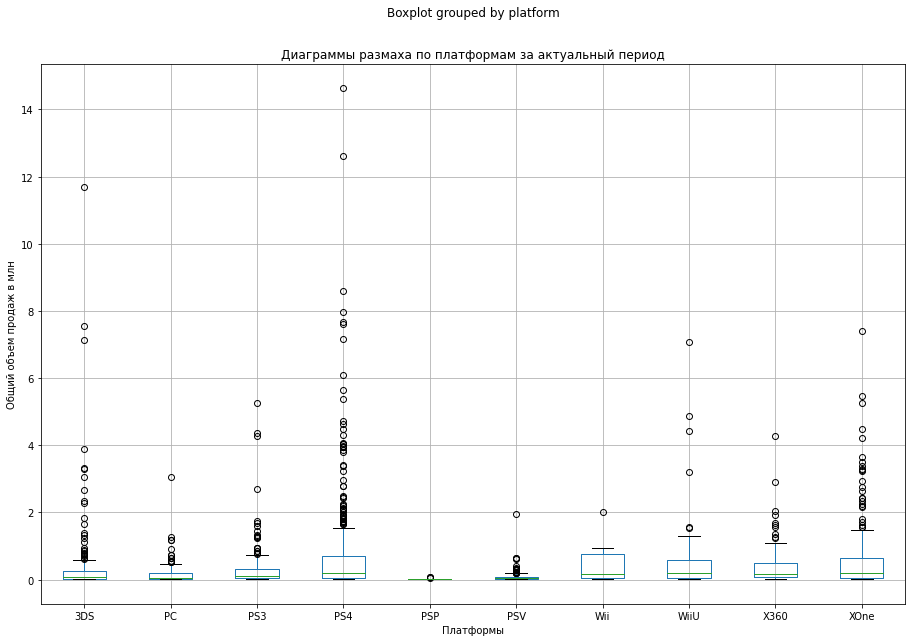

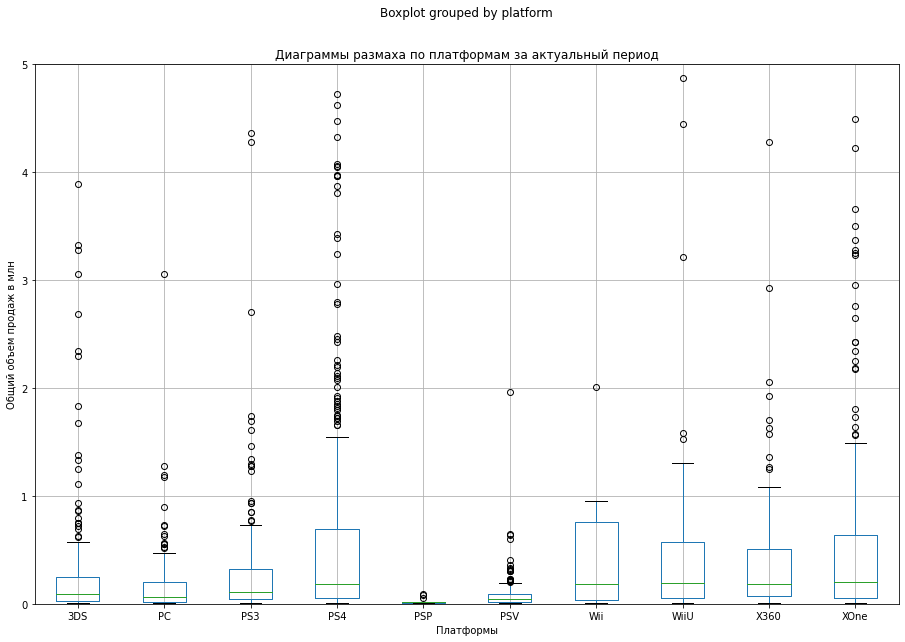

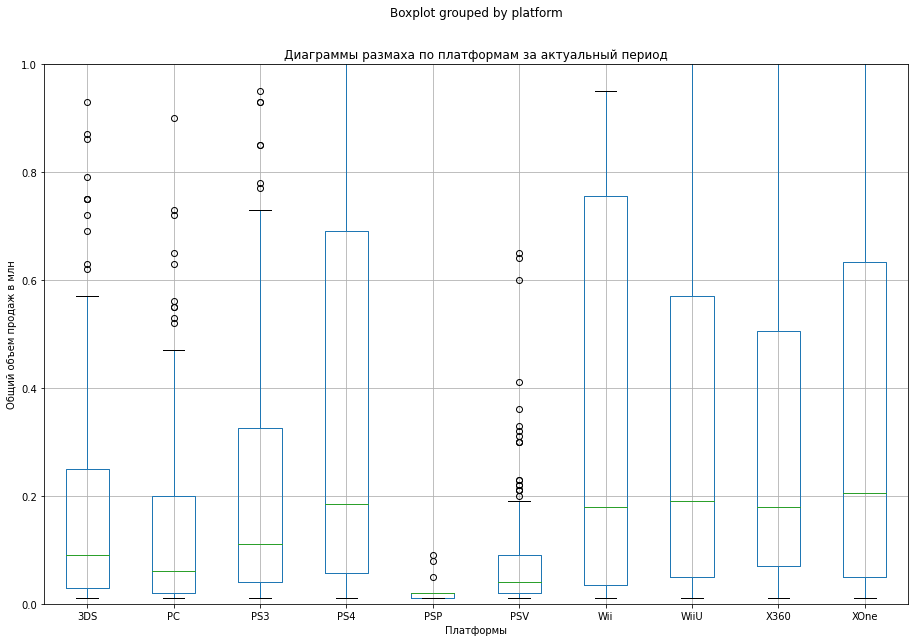

In [17]:
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title("Диаграммы размаха по платформам за актуальный период")
plt.xlabel("Платформы")
plt.ylabel("Общий объем продаж в млн")
plt.show()
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.ylim(0, 5)
plt.title("Диаграммы размаха по платформам за актуальный период")
plt.xlabel("Платформы")
plt.ylabel("Общий объем продаж в млн")
plt.show()
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title("Диаграммы размаха по платформам за актуальный период")
plt.xlabel("Платформы")
plt.ylabel("Общий объем продаж в млн")
plt.ylim(0, 1)
plt.show()

In [18]:
df_new.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


На диаграмме заметны выбросы. Оставим их,они связаны с сверх поплуярными играми(такими как Call of Duty на PS4,например).
Так же практически у всех платформ большая часть значений больше медианного. 
Наиболее длинный ряд упешно продающихся игр у PS4, XONE и WIIU.  

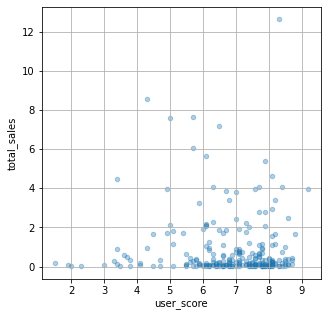

In [19]:
df_user_ps4 = df_new.query('platform=="PS4" and user_score!=-1')
df_critic_ps4 = df_new.query('platform=="PS4" and critic_score!=-1')
df_user_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.35, figsize=(5,5), grid=True);
#диаграмма рассеяния по отзывам пользователей

In [20]:

print(len(df_new.query('user_score!=-1')))
print(len(df_new.query('critic_score!=-1')))
print(len(df_new.query('user_score!=-1 and critic_score!=-1')))

888
718
704


In [21]:
df_user_ps4['total_sales'].corr(df_user_ps4['user_score'])

-0.040131589472697356

Из диаграммы видно, что основная масса оценок от 6 до 8 с копейками. Коэф. Пирсона показывает, что корреляция положительная- с ростом одной величины другая уменьшается. Однако коэф. около 0, т.е корреляции практически нет. Трудно говорить о том, что оценка влияет на продажи в данном контексте, к тому же вспомним,что датасет взяли за последние два года, где было падение продаж на протяжении этого периода.

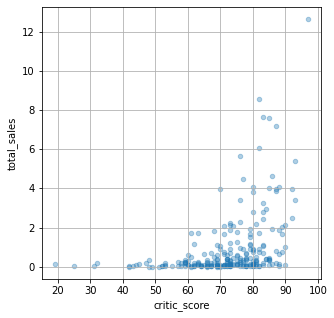

In [22]:
df_critic_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.35, figsize=(5,5), grid=True);
#диаграмма рассеяния по отзывам критиков

In [23]:
df_critic_ps4['total_sales'].corr(df_critic_ps4['critic_score'])

0.40266141068104083

История как использвователями, однако корреляция положительна и выражена сильнее.

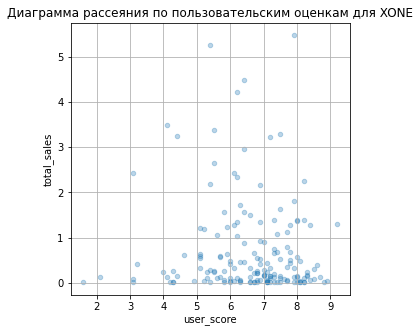

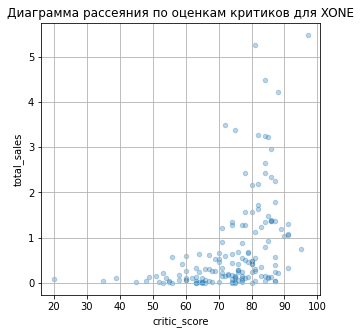

Корреляция по пользователям: -0.0703839280647581
Корреляция по критикам: 0.42867694370333226


In [24]:
df_user_xone = df_new.query('platform=="XOne" and user_score!=-1')
df_critic_xone = df_new.query('platform=="XOne" and critic_score!=-1')

df_user_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по пользовательским оценкам для XONE')
plt.show()
df_critic_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков для XONE')
plt.show()
print('Корреляция по пользователям:', df_user_xone['user_score'].corr(df_user_xone['total_sales']))
print('Корреляция по критикам:', df_critic_xone['critic_score'].corr(df_critic_xone['total_sales']))

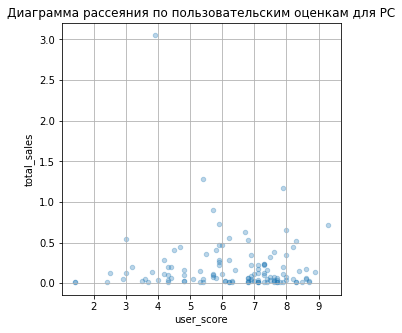

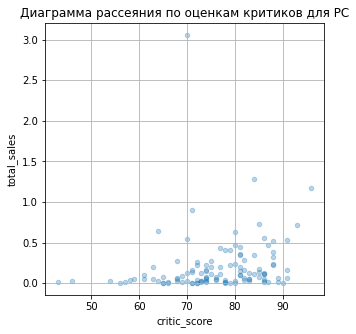

Корреляция по пользователям: -0.07159665703472451
Корреляция по критикам: 0.17463413769350036


In [25]:
df_user_pc = df_new.query('platform=="PC" and user_score!=-1')
df_critic_pc = df_new.query('platform=="PC" and critic_score!=-1')

df_user_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по пользовательским оценкам для PC')
plt.show()
df_critic_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков для PC')
plt.show()
print('Корреляция по пользователям:', df_user_pc['user_score'].corr(df_user_pc['total_sales']))
print('Корреляция по критикам:', df_critic_pc['critic_score'].corr(df_critic_pc['total_sales']))

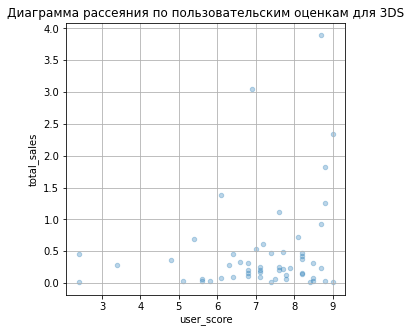

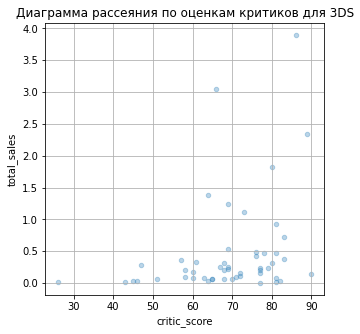

Корреляция по пользователям: 0.2151932718527028
Корреляция по критикам: 0.314117492869051


In [26]:
df_user_3ds = df_new.query('platform=="3DS" and user_score!=-1')
df_critic_3ds = df_new.query('platform=="3DS" and critic_score!=-1')

df_user_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по пользовательским оценкам для 3DS')
plt.show()
df_critic_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков для 3DS')
plt.show()
print('Корреляция по пользователям:', df_user_3ds['user_score'].corr(df_user_3ds['total_sales']))
print('Корреляция по критикам:', df_critic_3ds['critic_score'].corr(df_critic_3ds['total_sales']))

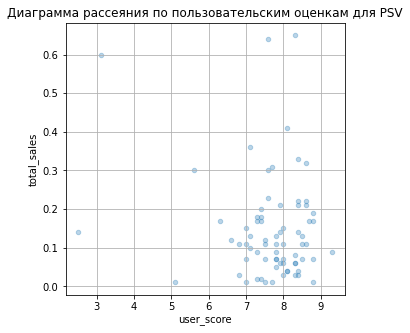

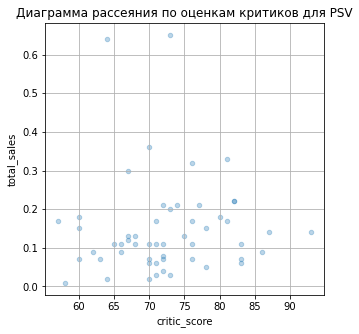

Корреляция по пользователям: -0.16845504978064446
Корреляция по критикам: 0.04266490657009526


In [27]:
df_user_psv = df_new.query('platform=="PSV" and user_score!=-1')
df_critic_psv = df_new.query('platform=="PSV" and critic_score!=-1')


df_user_psv.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по пользовательским оценкам для PSV')
plt.show()
df_critic_psv.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков для PSV')
plt.show()
print('Корреляция по пользователям:', df_user_psv['user_score'].corr(df_user_psv['total_sales']))
print('Корреляция по критикам:', df_critic_psv['critic_score'].corr(df_critic_psv['total_sales']))

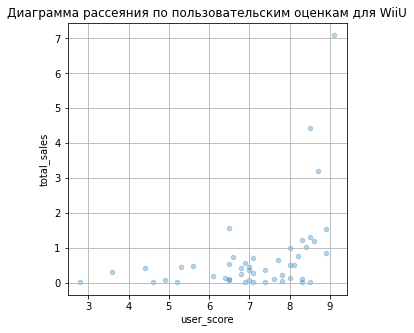

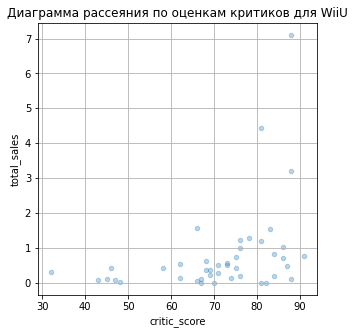

Корреляция по пользователям: 0.40792645792170773
Корреляция по критикам: 0.370201412480884


In [28]:
df_user_wiiu = df_new.query('platform=="WiiU" and user_score!=-1')
df_critic_wiiu = df_new.query('platform=="WiiU" and critic_score!=-1')


df_user_wiiu.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по пользовательским оценкам для WiiU')
plt.show()
df_critic_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('Диаграмма рассеяния по оценкам критиков для WiiU')
plt.show()
print('Корреляция по пользователям:', df_user_wiiu['user_score'].corr(df_user_wiiu['total_sales']))
print('Корреляция по критикам:', df_critic_wiiu['critic_score'].corr(df_critic_wiiu['total_sales']))

Сравнивая, наш результат с другими платформами, можно сказать, что оценка критиков имеет большее значение нежели оценка пользователей, хотя корреляция также остается мальенькой. А в случае с Wiiu корреляции практически сравнялись 


3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

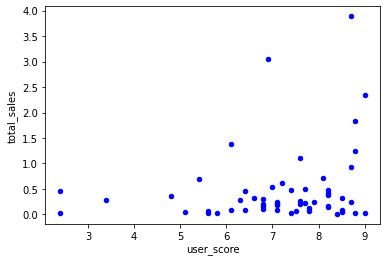

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

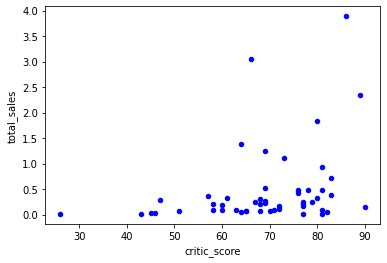

PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

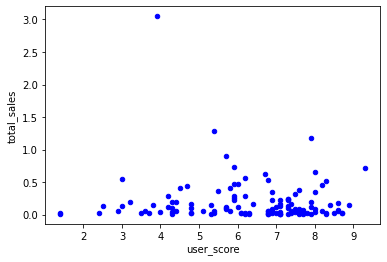

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

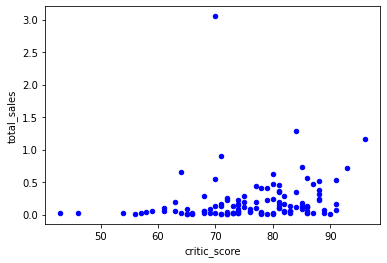

PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

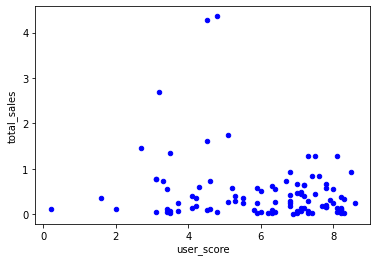

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

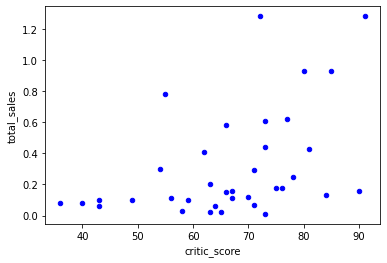

PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

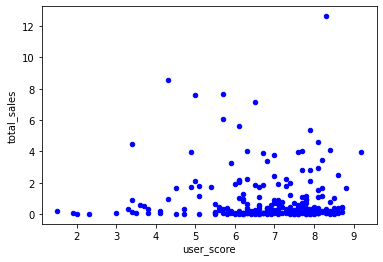

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

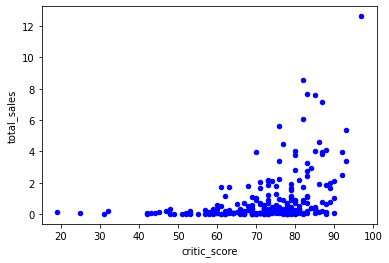

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

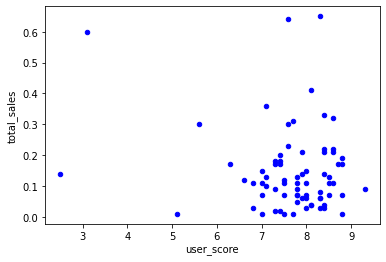

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

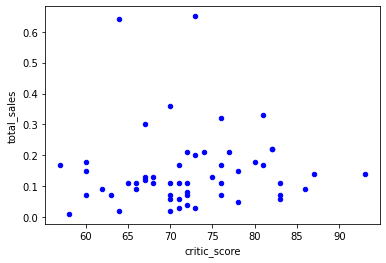

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

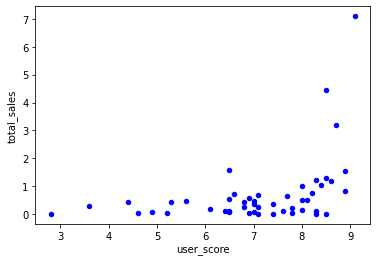

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

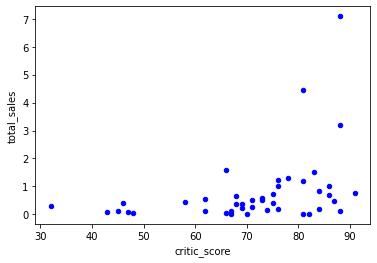

X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

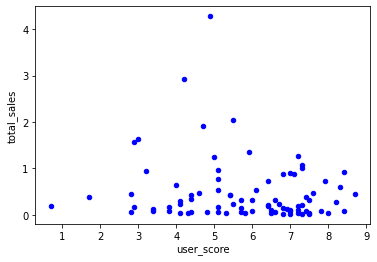

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

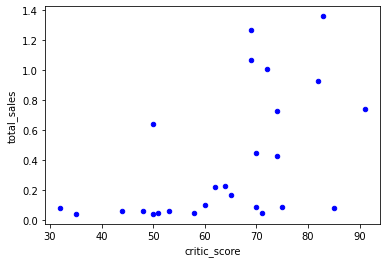

XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

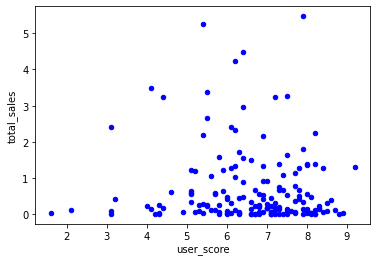

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

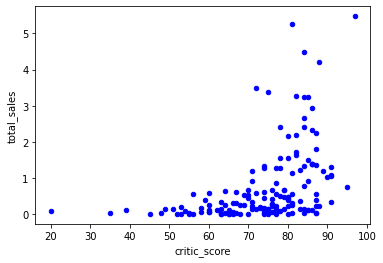

In [43]:
# Цикл 
import matplotlib.pyplot as plt
df_sc, y = df_new.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 10 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')


<font color='DarkGreen'>👌 Для оценки корреляции воспользуемся шкалой:</font>
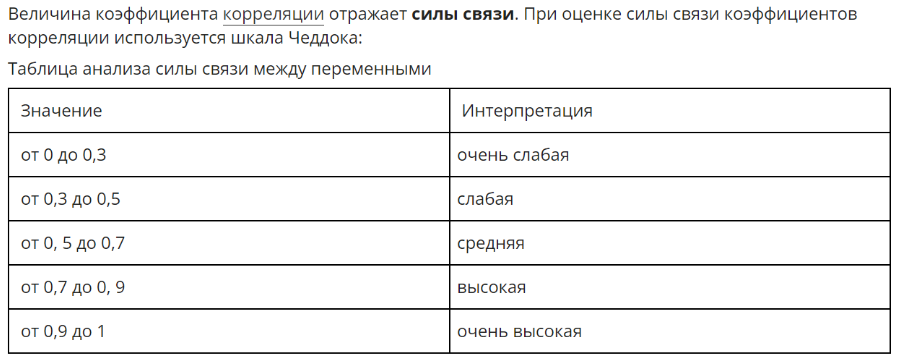

Посмотрим на общее распределение игр по жанрам:

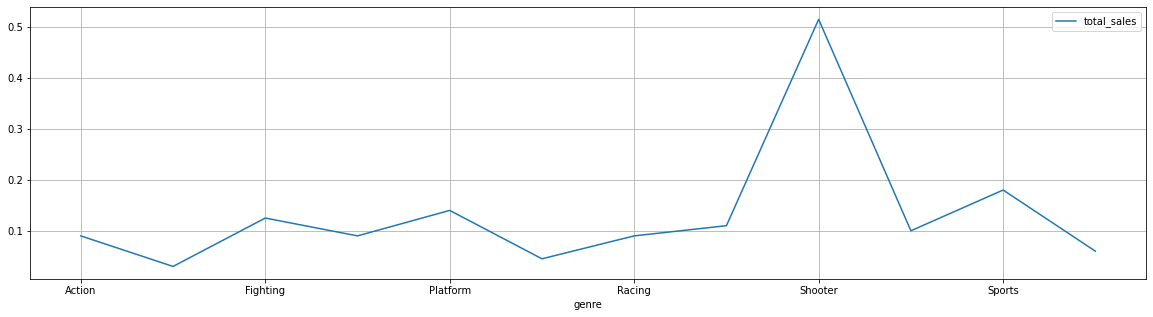

In [29]:
dd=df_new.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(grid=True,figsize=(20,5))

Жанр Shooter является самым продаваемым, на втором месте,третьем месте расположились Sports и Fighting.

## Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

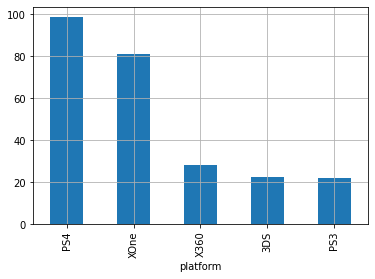

In [31]:
df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'na_sales', kind = 'bar', grid=True);

Самой популярной платформой в Северной Америке оказалась PS4.

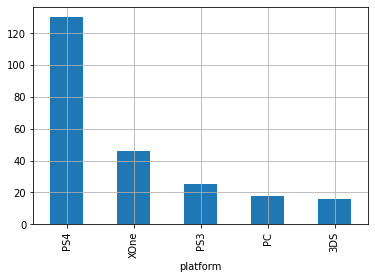

In [32]:
df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'eu_sales', kind = 'bar', grid=True);

В европе та же история

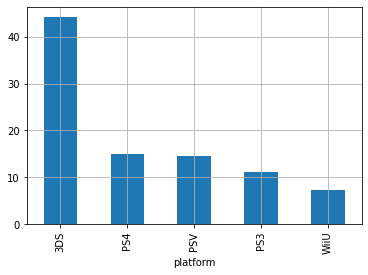

In [33]:
df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'jp_sales', kind = 'bar', grid=True);

А вот лидером на рынке Японии оказалась 3DS. Чтобы оценить различия в долях продаж достаточно взглянуть на ось Y. В Японии доля рынка заметно меньше, это обусловлено тем, что население Японии в разы меньше населения той же Северной Америки.


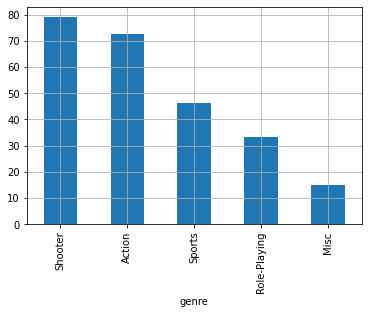

In [34]:
df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'na_sales', kind = 'bar', grid=True);

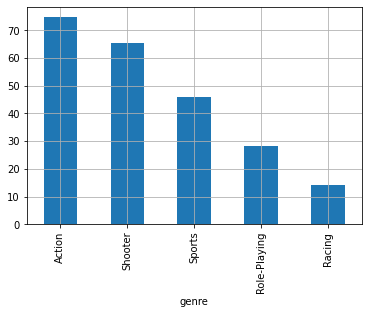

In [35]:
df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'eu_sales', kind = 'bar', grid=True);

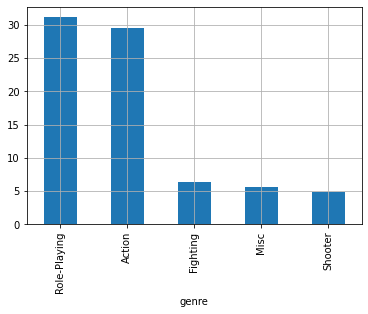

In [36]:
df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'jp_sales', kind = 'bar', grid=True);


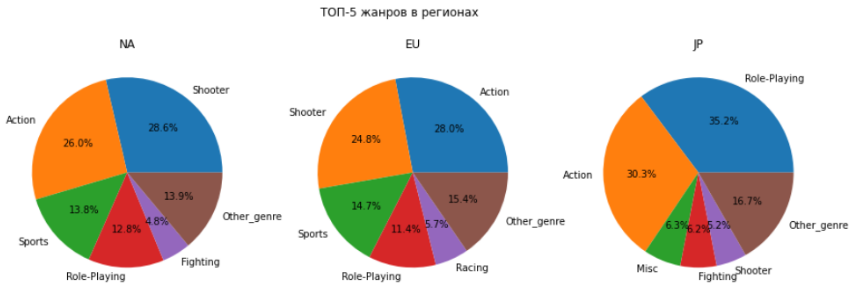

Во всех трех регионах топ-5 жанров одинаковы. В Северной Америке количество продаж в первой пятерке, как видно по оси У, немногим больше чем в других регионах. А в Японии жанр Misc обогнал Racing и вошел в топ-5

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

в Японии картина по жанрам совсем, другая, тут лидирует Role-Playing


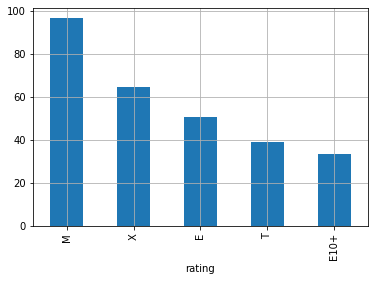

In [37]:
df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'na_sales', kind = 'bar', grid=True);

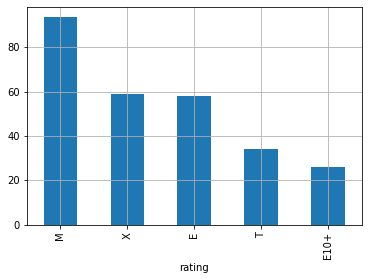

In [38]:
df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'eu_sales', kind = 'bar', grid=True);

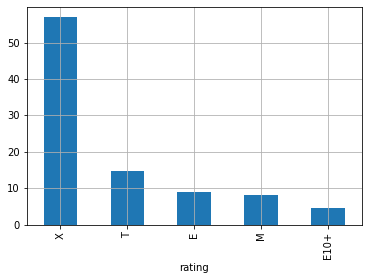

In [39]:
df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'jp_sales', kind = 'bar', grid=True);

В Северной америке самые низкие продажи у игр в возрастной группе 10+, самые большие продажи в категории Е- "Для всех". Хронология прослеживается и в двух других регионах.

## Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для провеки первой теории сформулируем гипотезы так:
* H0- средние пользовательские рейтинги платформ равны;
* H1- средние пользовательские рейтинги платформ не равны.


In [40]:
df_x = df_new.query('platform == "XOne" and user_score!=-1')
df_pc = df_new.query('platform == "PC" and user_score!=-1')
alpha = .05 

results = st.ttest_ind(
df_x['user_score'],
df_pc['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Для второй:
* H0- средние пользовательские рейтинги жанров равны;
* H1- средние пользовательские рейтинги жанров не равны.

In [41]:
df_a = df_new.query('genre == "Action" and user_score!=-1')
df_s = df_new.query('genre == "Sports" and user_score!=-1')
alpha = .05 

results = st.ttest_ind(
df_a['user_score'],
df_s['user_score'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


После проверки гипотез получаем:
* Средние пользовательские рейтинги платформ Xbox One и PC  одинаковы;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  не равны.

Для проверки гипотез я применял t-критерий Стьюдента(Проверка гипотезы о равенстве средних значений)  т.к. :
* две выборки являются независимыми; 
* дисперсии двух генеральных совокупностей равны.

In [42]:
print('Ср. пользовательский рейтинг Xbox One:',df_x['user_score'].mean())
print('Ср. пользовательский рейтинг PC:',df_pc['user_score'].mean())
print('Ср. пользовательский рейтинг Action:',df_a['user_score'].mean())
print('Ср. пользовательский рейтинг Sports:',df_s['user_score'].mean())


Ср. пользовательский рейтинг Xbox One: 6.594545454545456
Ср. пользовательский рейтинг PC: 6.298360655737705
Ср. пользовательский рейтинг Action: 6.760606060606061
Ср. пользовательский рейтинг Sports: 5.2251968503937


## Общий вывод

Данные датасета до 90х годов можно не рассматривать,так как их довольно мало. Все платформы показывают спад на текущий год(2016), причем все ,кроме лидирующей тройки, стремятся к нулю. Для дальнейшего прогнозирования мы взяли данные за последние два года. Ящики с усами дали нам понять,что PS4- лидер аномально продаваемых игр.
Также увидели,что корреляции между отзывами пользователей- нет, среди оценок критиков прослеживается слабая корреляция, но не по всем платформам.
Жанр Shooter является самым продаваемым, на втором месте и третьих местах расположились Sports и Fighting.
Любимая платформа у пользователей Америки и Европы- PS4, у Японцев-3DS.В жанрах же вкусы всех трех регионов схожи.
Ну и подводя итог, благодаря проверке наших гипотез, мы можем утверждать, что:
* Средние пользовательские рейтинги платформ Xbox One и PC  одинаковы;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.


Стратегия на 2017 год:
Для успешных продаж нам необходимо сделать следующие акценты:
1. Перспективные платформы на следующий год – ps4,xone,3ds
2. Топовые жанры –Shooter,Sports,Fighting, но и не стоит забывать,в прошлом на других платформах был сверх популярен Action
3. Большее количество продаж приходится на рейтинг E и X
4. Также необходимо составить полный список аномально продаваемых игр прошлых лет и приобретать их новые релизы. Например для PS4 это Call of Duty 

В Европе и Америке необходимо сделать акцент на PS4, в Японии на 3DS.Жанр выбираем Shooter, а рейтинг E. Рекламиировать лучше начать с Америки там, болше численность и продаж по играм. На отзывы пользователей обрашать внимания не стоит,а вот к критикам можно прислушаться. Жанр для японцев выбираем Role-Playing, а рейтинг X. Акцент лучше сделать на Америку и Европу- вкусы пользователей там идентичны и охват в разы больше чем в Японии.
    